Projeto final - TOTI MED - Grupo 3

In [21]:
##Importamos as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

1. Entendimento de negócio

Qual é a idade média dos pacientes hospitalizados?

Qual convenio é mais utilizado pelos pacientes?

Quais são os tipos sanguíneos mais comuns dos pacientes?

Qual doença é a mais comum?

Quantidade de pacientes pelo tipo de admissão.

Quantidade de pessoas por resultado de teste.

2. Entendimento e preparação dos dados

In [2]:
#importando e carregando os dados, usamos a biblioteca pandas junto com a função read
df_condicao_medica = pd.read_csv('/content/_table_condicao_medica.csv', delimiter=';')
df_convenio = pd.read_csv('/content/_table_convenio.csv', delimiter=';')
df_hospital = pd.read_csv('/content/_table_hospital.csv', delimiter=';')
df_hospital_admissao = pd.read_csv('/content/_table_hospital_admissao.csv', delimiter=';')
df_hospital_convenio = pd.read_csv('/content/_table_hospital_convenio.csv', delimiter=';')
df_paciente = pd.read_csv('/content/_table_paciente.csv', delimiter=';')
df_sexo = pd.read_csv('/content/_table_sexo.csv', delimiter=';')
df_teste = pd.read_csv('/content/_table_teste.csv', delimiter=';')
df_tipo_admissao = pd.read_csv('/content/_table_tipo_admissao.csv', delimiter=';')
df_tipo_sanguineo = pd.read_csv('/content/_table_tipo_sanguineo.csv', delimiter=';')

In [3]:
#Verificando e exibindo dados
df_condicao_medica.head()

,id,doenca
0,1,Diabetes
1,2,Asma
2,3,Obesidade
3,4,Artrite
4,5,Hipertensão


In [4]:
#Verificando e exibindo dados
df_paciente.head()

,id,nome_completo,idade,sexo_id,data_admissao,data_quitacao,tipo_sanguineo_id,condicao_medica_id,hospital_id,teste_id
0,1,Tiffany Ramirez,81,1,2022-11-17,2022-12-01,1,1,1,1
1,2,Ruben Burns,35,2,2023-06-01,2023-06-15,2,2,2,2
2,3,Chad Byrd,61,2,2019-01-09,2019-02-08,3,3,3,2
3,4,Antonio Frederick,49,2,2020-05-02,2020-05-03,3,2,4,3
4,5,Chris Roth,80,1,2021-07-09,2021-08-02,7,5,4,1


In [5]:
#Verificando os tipos de dados
df_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  int64 
 1   nome_completo       10000 non-null  object
 2   idade               10000 non-null  int64 
 3   sexo_id             10000 non-null  int64 
 4   data_admissao       10000 non-null  object
 5   data_quitacao       10000 non-null  object
 6   tipo_sanguineo_id   10000 non-null  int64 
 7   condicao_medica_id  10000 non-null  int64 
 8   hospital_id         10000 non-null  int64 
 9   teste_id            10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [6]:
#Para verificação dos tipos de dados nas tabelas
df_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  int64 
 1   nome_completo       10000 non-null  object
 2   idade               10000 non-null  int64 
 3   sexo_id             10000 non-null  int64 
 4   data_admissao       10000 non-null  object
 5   data_quitacao       10000 non-null  object
 6   tipo_sanguineo_id   10000 non-null  int64 
 7   condicao_medica_id  10000 non-null  int64 
 8   hospital_id         10000 non-null  int64 
 9   teste_id            10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [7]:
#Verificando dados duplicados nas tabelas
total_duplicados = df_hospital.duplicated().sum()
print("Total dados duplicados: ", total_duplicados)

Total dados duplicados:  0


In [8]:
#Verificando dados
df_paciente.isnull().sum()

id                    0
nome_completo         0
idade                 0
sexo_id               0
data_admissao         0
data_quitacao         0
tipo_sanguineo_id     0
condicao_medica_id    0
hospital_id           0
teste_id              0
dtype: int64

3. Resposta das perguntas

Qual é a idade média dos pacientes hospitalizados?

In [9]:
#consultamos idade média nos pacientes
total_pacientes = len(df_paciente)
idade_pacientes = sum(df_paciente["idade"])

idade_media = idade_pacientes/total_pacientes

print("Idade media dos pacientes: ", idade_media)

Idade media dos pacientes:  51.4522


Qual convenio é mais utilizado pelos pacientes?

In [10]:
#consultamos os convenios mais utilizados
#fizemos um primer merge com hospital_convenio para relacionar os dataframe df_paciente e df_hospital_convenio
hospital_convenio = pd.merge(df_paciente, df_hospital_convenio, left_on='hospital_id', right_on='id')

#fizemos um segundo mergue com hospital_convenio e df_convenio para conseguir relacionar os dataframe e saber quais são os convenios mais utilizados
convenio = pd.merge(hospital_convenio, df_convenio, left_on='convenio_id', right_on='id')

print("Convenios mais utilizados: ", convenio.groupby('nome').count().sort_values('id_x', ascending=False).id_x)

Convenios mais utilizados:  nome
Blue Cross          2070
Cigna               2068
Aetna               2043
UnitedHealthcare    1925
Medicare            1894
Name: id_x, dtype: int64


Quais são os tipos sanguíneos mais comuns dos pacientes?

In [11]:
#consultamos os tipos sanguíneos
#relacionamento dos dataframes, para obter dados consolidados
tipo_sanguineo = pd.merge(df_paciente, df_tipo_sanguineo, left_on='tipo_sanguineo_id', right_on='id')

# Agrupamos pelo tipo de sangue, fazemos a contagem e ordenamos pela quantidade de forma descendente
print("Tipos sanguíneos mais comuns: ", tipo_sanguineo.groupby('tipo').count().sort_values('id_x', ascending=False).id_x)

Tipos sanguíneos mais comuns:  tipo
AB-    1275
AB+    1258
B-     1252
O+     1248
B+     1244
O-     1244
A+     1241
A-     1238
Name: id_x, dtype: int64


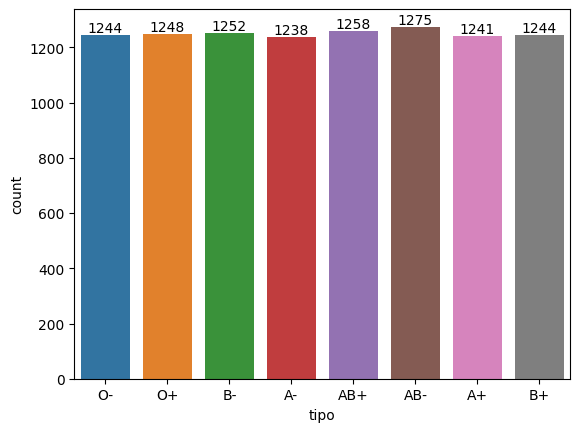

In [12]:
#criação de grafico dos tipos sanguíneos

ax = sns.countplot(x='tipo', data=tipo_sanguineo)
ax.bar_label(ax.containers[0])

#geramos um PDF com o grafico, esta listado junto com as tabelas
plt.savefig('Figure4.pdf')

# Mostrar el gráfico
plt.show()



Qual doença é a mais comum?

In [13]:
#relacionamento dos dataframes, para obter dados consolidados
condicao_medica = pd.merge(df_paciente, df_condicao_medica, left_on='condicao_medica_id', right_on='id').groupby('doenca').count()
print("Condições médicas mais comuns: ", condicao_medica.id_x)

Condições médicas mais comuns:  doenca
Artrite        1650
Asma           1708
Câncer         1703
Diabetes       1623
Hipertensão    1688
Obesidade      1628
Name: id_x, dtype: int64


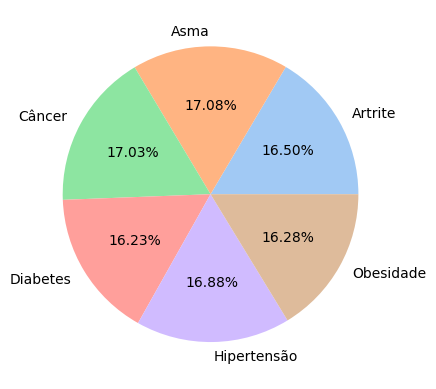

<Figure size 640x480 with 0 Axes>

In [14]:
#criação de grafico das doenças mais comums

#definimos com Seaborn as cores para usar no grafico
colors = sns.color_palette('pastel')[0:8]

#criamos o grafico
ax = plt.pie(x=condicao_medica.id_x, labels = condicao_medica.index, colors = colors, autopct='%.2f%%')
plt.show()

#geramos um PDF com o grafico, esta listado junto com as tabelas
plt.savefig('Figure2.pdf')


Quantidade de pacientes pelo tipo de admissão.

In [15]:
#usamos merge para saber os tipos de admissão pela quantidade de pacientes
tipo_admissao = pd.merge(df_hospital_admissao, df_tipo_admissao, left_on='tipo_admissao_id', right_on='id').groupby('tipo').count()
print("Tipos de admissão: ", tipo_admissao.id_x)

Tipos de admissão:  tipo
Eletiva       3242
Emergência    3367
Urgente       3391
Name: id_x, dtype: int64


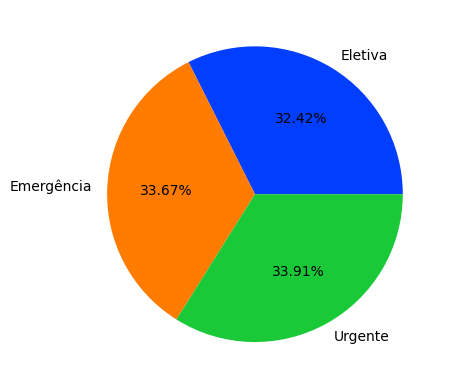

In [16]:
#criação de grafico para tipo de admissão

#definimos com Seaborn as cores para usar no grafico
colors = sns.color_palette('bright')[0:5]

#criamos o grafico
ax = plt.pie(x=tipo_admissao.id_x, labels = tipo_admissao.index, colors = colors, autopct='%.2f%%')
plt.show()

Quantidade de pessoas por resultado de teste

In [17]:
#usamos merge para saber a quantidade de pessoas e os tipos de resultados
tipo_teste = pd.merge(df_paciente, df_teste, left_on='teste_id', right_on='id')
print("Tipos de resultados: ", tipo_teste.groupby('tipo').count().id_x)


Tipos de resultados:  tipo
Anormal         3456
Inconclusivo    3277
Normal          3267
Name: id_x, dtype: int64


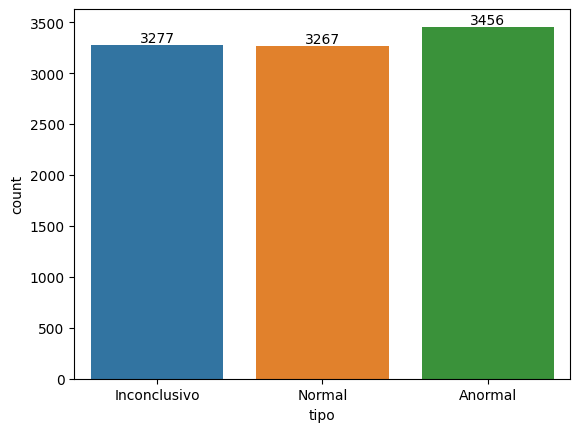

In [18]:
#criação de grafico resultado de testes

ax = sns.countplot(x='tipo', data=tipo_teste)
ax.bar_label(ax.containers[0])

#geramos um PDF com o grafico, esta listado junto com as tabelas
plt.savefig('Figure5.pdf')

# Mostrar el gráfico
plt.show()